# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
352,33,Private,111363,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
15801,34,Private,242960,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
999,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
7039,21,Private,83141,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,53,United-States,<=50K
21871,52,Private,183611,1st-4th,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
8736,46,Private,174426,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
27214,30,Private,154568,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,36,Vietnam,>50K
3953,44,Private,286750,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K
20692,60,Private,276009,HS-grad,9,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,30,Philippines,<=50K
12407,71,State-gov,210673,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,28,United-States,<=50K


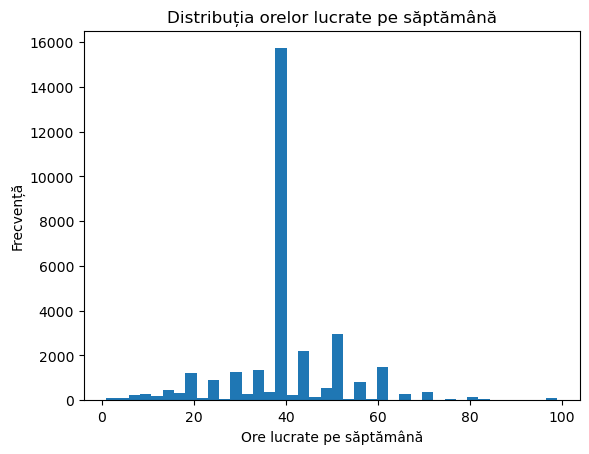

In [18]:
plt.figure()
plt.hist(data["hours-per-week"], bins=40)
plt.xlabel("Ore lucrate pe săptămână")
plt.ylabel("Frecvență")
plt.title("Distribuția orelor lucrate pe săptămână")
plt.show()


### Distribuția orelor lucrate pe săptămână

Graficul de mai sus ilustrează distribuția variabilei țintă *ore lucrate pe săptămână*.
Se observă o concentrare foarte puternică în jurul valorii de 40 de ore, ceea ce
corespunde programului standard de muncă cu normă întreagă. Această valoare reprezintă
modulul distribuției.

Distribuția este asimetrică spre dreapta, existând o coadă lungă pentru valorile
mari ale orelor lucrate. Acest lucru indică prezența unor persoane care lucrează
semnificativ peste media obișnuită, unele valori ajungând până la 90–100 de ore pe
săptămână, fiind considerate valori extreme (outliers).

De asemenea, se observă existența unor valori mici ale orelor lucrate (sub 10 ore),
care pot corespunde muncii cu timp parțial sau unor situații atipice. Aceste caracteristici
sugerează o heterogenitate ridicată a programului de muncă în cadrul populației analizate
și justifică necesitatea unei analize atente a valorilor extreme în etapa de modelare.

In [15]:
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Statistici descriptive ale variabilelor numerice

Tabelul de mai sus prezintă principalele statistici descriptive pentru variabilele numerice
din setul de date analizat. Variabila țintă, *hours-per-week*, are o valoare medie de
aproximativ 40.4 ore, foarte apropiată de mediană (40 ore), ceea ce confirmă
concentrarea majorității observațiilor în jurul programului standard de lucru.

Deviația standard relativ ridicată (≈12.3 ore) indică o variabilitate semnificativă
a timpului de muncă între indivizi, susținând observațiile anterioare privind existența
valorilor extreme. Intervalul valorilor este larg, de la 1 oră până la 99 de ore
lucrate pe săptămână.

În ceea ce privește celelalte variabile numerice, vârsta are o medie de aproximativ
38.6 ani, cu o distribuție relativ echilibrată, în timp ce nivelul educațional
(*education-num*) se concentrează în jurul valorii de 10 ani de educație.
Variabilele *capital-gain* și *capital-loss* prezintă distribuții puternic asimetrice,
cu un număr mare de valori zero și câteva valori extreme, sugerând o polarizare
pronunțată a veniturilor din capital.


In [27]:
# Calcularea valorilor lipsă
numar_lipsa = data.isna().sum()
procent_lipsa = (numar_lipsa / len(data) * 100).round(2)

# Crearea raportului
raport_valori_lipsa = (
    pd.DataFrame({
        "Număr valori lipsă": numar_lipsa,
        "Procent valori lipsă (%)": procent_lipsa
    })
    .sort_values("Număr valori lipsă", ascending=False)
)

raport_valori_lipsa.loc[raport_valori_lipsa["Număr valori lipsă"] > 0]


,Număr valori lipsă,Procent valori lipsă (%)


### Analiza valorilor lipsă

Tabelul de mai sus prezintă numărul și procentul valorilor lipsă pentru fiecare
variabilă din setul de date. Se observă că valorile lipsă apar exclusiv în anumite
variabile categorice, ceea ce este specific acestui set de date.

Identificarea valorilor lipsă este un pas esențial în analiza exploratorie,
deoarece acestea pot influența rezultatele modelelor statistice și de învățare
automată. În etapele următoare, aceste valori vor fi tratate prin metode
adecvate de preprocesare.

În urma analizei, nu au fost identificate valori lipsă de tip `NaN` în setul de date.
Acest rezultat se datorează faptului că, în acest set de date, lipsurile sunt codificate
sub forma caracterului `?`, și nu ca valori lipsă standard (`NaN`).

Prin urmare, funcția `isna()` nu identifică aceste valori în forma inițială a datelor.
Pentru o analiză corectă a lipsurilor, este necesară recodificarea simbolului `?` în `NaN`,
pas care va fi realizat în etapa de preprocesare.

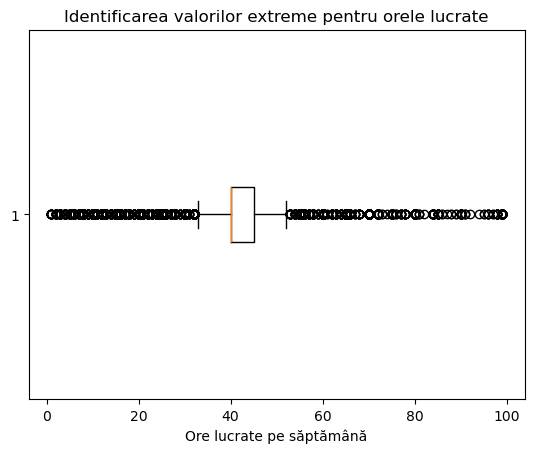

In [28]:
plt.figure()
plt.boxplot(data["hours-per-week"], vert=False)
plt.xlabel("Ore lucrate pe săptămână")
plt.title("Identificarea valorilor extreme pentru orele lucrate")
plt.show()

### Identificarea valorilor extreme pentru orele lucrate pe săptămână

Boxplot-ul de mai sus evidențiază distribuția variabilei hours-per-week și permite
identificarea valorilor extreme. Cutia centrală indică faptul că majoritatea
persoanelor lucrează între aproximativ 40 și 45 de ore pe săptămână, iar mediana este
situată în jurul valorii de 40 de ore, confirmând observațiile din analiza distribuției.

Se observă un număr considerabil de valori extreme, în special în partea superioară
a distribuției, corespunzătoare persoanelor care lucrează peste 60–70 de ore pe săptămână.
Există, de asemenea, câteva valori extreme inferioare, asociate cu un număr foarte mic
de ore lucrate, posibil specifice muncii cu timp parțial sau situațiilor atipice.

Prezența acestor valori extreme indică o variabilitate ridicată a timpului de muncă
și sugerează necesitatea unei analize atente în etapa de modelare, deoarece outlierii
pot influența semnificativ estimările modelelor de regresie.



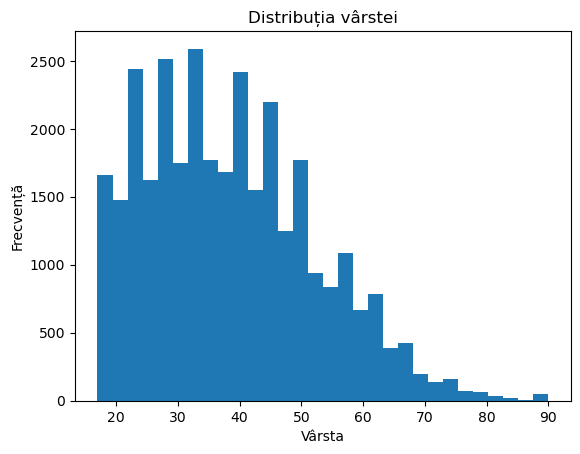

In [29]:
plt.figure()
plt.hist(data["age"], bins=30)
plt.xlabel("Vârsta")
plt.ylabel("Frecvență")
plt.title("Distribuția vârstei")
plt.show()


### Distribuția vârstei

Histograma indică o concentrare ridicată a observațiilor în intervalul 20–50 de ani,
cu un vârf în jurul vârstei de 30–40 de ani. Distribuția este asimetrică spre dreapta,
iar frecvența scade progresiv pentru vârstele mai înaintate, sugerând o reprezentare
mai redusă a persoanelor peste 60 de ani în setul de date.


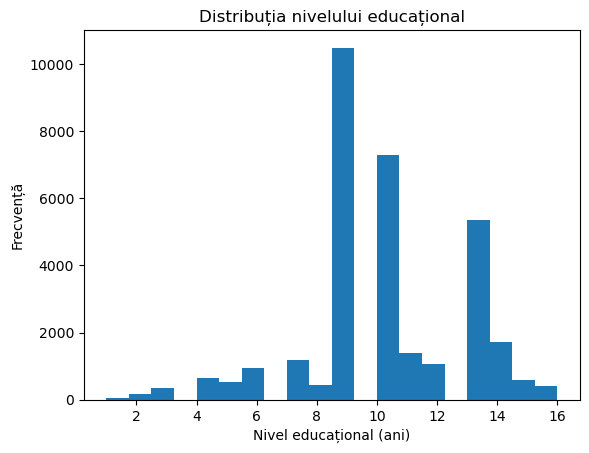

In [37]:
plt.figure()
plt.hist(data["education-num"], bins=20)
plt.xlabel("Nivel educațional (ani)")
plt.ylabel("Frecvență")
plt.title("Distribuția nivelului educațional")
plt.show()


### Distribuția nivelului educațional

Distribuția nivelului educațional prezintă valori concentrate în jurul
nivelurilor medii, corespunzătoare învățământului liceal și postliceal.
Se observă câteva vârfuri distincte, ceea ce indică o distribuție discretă
a anilor de educație, specifică nivelurilor formale de școlarizare.
Valorile extreme sunt mai puțin frecvente.


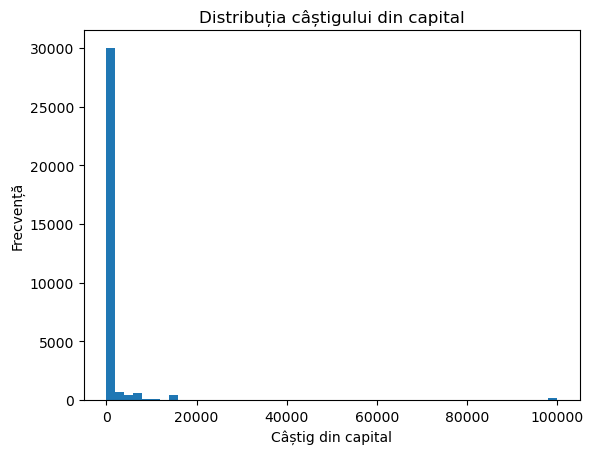

In [38]:
plt.figure()
plt.hist(data["capital-gain"], bins=50)
plt.xlabel("Câștig din capital")
plt.ylabel("Frecvență")
plt.title("Distribuția câștigului din capital")
plt.show()


### Distribuția câștigului din capital

Distribuția câștigului din capital este puternic asimetrică spre dreapta.
Majoritatea observațiilor au valoarea zero, indicând faptul că o mare parte
a populației nu obține venituri din capital. Există însă câteva valori foarte
mari, considerate extreme, care întind distribuția până la niveluri ridicate.

Această structură sugerează o polarizare accentuată a veniturilor din capital
și indică necesitatea unei tratări speciale a acestei variabile în etapele
ulterioare de analiză și modelare.


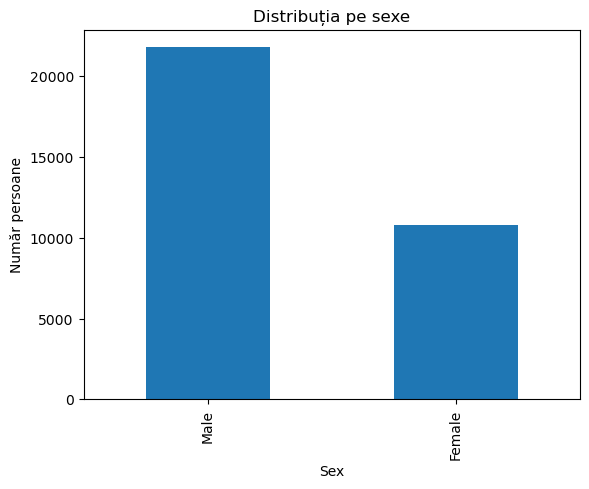

In [43]:
data["sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Număr persoane")
plt.title("Distribuția pe sexe")
plt.show()


### Distribuția pe sexe

Graficul evidențiază o distribuție dezechilibrată a populației în funcție de sex,
cu un număr mai mare de bărbați comparativ cu femei. Această diferență poate influența
analizele ulterioare și trebuie avută în vedere în interpretarea rezultatelor,
în special în modelele predictive.


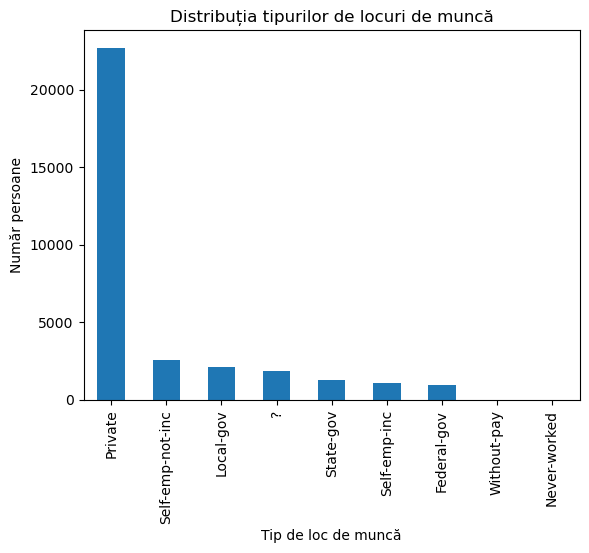

In [44]:
data["workclass"].value_counts().plot(kind="bar")
plt.xlabel("Tip de loc de muncă")
plt.ylabel("Număr persoane")
plt.title("Distribuția tipurilor de locuri de muncă")
plt.show()


### Distribuția tipurilor de locuri de muncă

Graficul arată că majoritatea persoanelor din setul de date lucrează în sectorul privat,
care domină clar distribuția. Celelalte tipuri de locuri de muncă, precum sectorul
guvernamental sau activitățile independente, sunt mult mai puțin reprezentate.

Se observă și prezența unei categorii neidentificate, indicată prin simbolul „?”,
ceea ce sugerează existența unor valori lipsă sau incomplete în această variabilă.
Această situație necesită atenție în etapa de preprocesare a datelor.


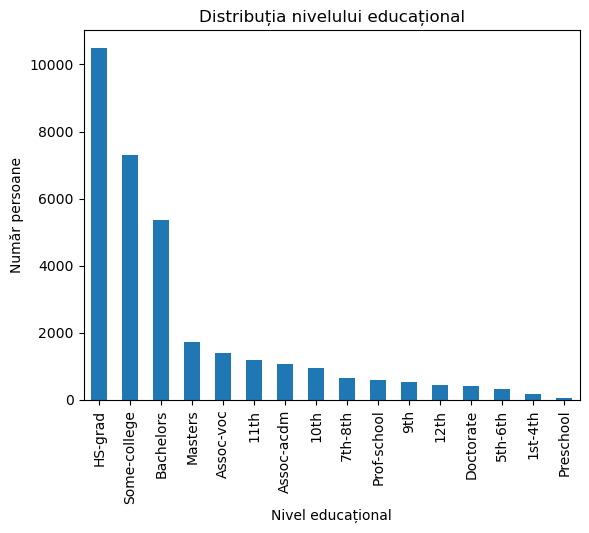

In [45]:
data["education"].value_counts().plot(kind="bar")
plt.xlabel("Nivel educațional")
plt.ylabel("Număr persoane")
plt.title("Distribuția nivelului educațional")
plt.show()


### Distribuția nivelului educațional

Graficul evidențiază o concentrare ridicată a persoanelor cu nivel educațional
mediu, în special absolvenți de liceu și studii postliceale sau universitare.
Nivelurile educaționale superioare, precum masteratul și doctoratul, sunt
mai puțin reprezentate, iar nivelurile foarte scăzute apar rar în setul de date.

Această distribuție reflectă structura educațională a populației analizate și
poate avea un impact semnificativ asupra variației orelor lucrate și a altor
rezultate socio-economice.


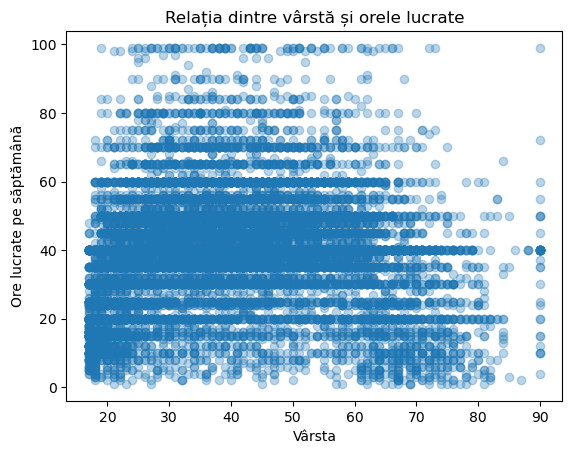

In [46]:
plt.figure()
plt.scatter(data["age"], data["hours-per-week"], alpha=0.3)
plt.xlabel("Vârsta")
plt.ylabel("Ore lucrate pe săptămână")
plt.title("Relația dintre vârstă și orele lucrate")
plt.show()


### Relația dintre vârstă și orele lucrate pe săptămână

Graficul de dispersie indică o relație slabă între vârstă și numărul de ore lucrate
pe săptămână. Majoritatea observațiilor sunt concentrate în jurul valorii de 40 de ore,
indiferent de vârstă, sugerând că programul standard de lucru este dominant pe toate
categoriile de vârstă.

Totuși, se observă o variabilitate mai mare a orelor lucrate la vârstele active
(aproximativ 25–60 de ani), în timp ce la vârstele înaintate apare o tendință de reducere
a timpului de muncă, posibil asociată cu pensionarea sau munca cu timp parțial.


## Raport final – Analiza exploratorie a datelor (EDA)

Analiza exploratorie a setului de date a avut ca obiectiv principal înțelegerea
distribuției variabilei țintă *hours-per-week* și identificarea principalelor
caracteristici ale populației analizate, precum și a potențialelor probleme de
calitate a datelor.

Distribuția orelor lucrate pe săptămână indică o concentrare puternică în jurul
valorii de 40 de ore, corespunzătoare programului standard de muncă cu normă
întreagă. Distribuția este asimetrică spre dreapta, fiind caracterizată de o coadă
lungă a valorilor mari. Boxplot-ul confirmă existența unor valori extreme, atât
superioare, cât și inferioare, care reflectă situații atipice precum munca
excesivă sau munca cu timp parțial.

Statistica descriptivă arată că media și mediana orelor lucrate sunt apropiate,
însă deviația standard relativ ridicată sugerează o variabilitate importantă
între indivizi. Variabilele numerice auxiliare evidențiază distribuții diferite:
vârsta este relativ echilibrată în intervalele active, nivelul educațional este
discret și concentrat în jurul învățământului liceal și postliceal, iar veniturile
din capital sunt puternic polarizate, cu un număr mare de valori zero și câteva
valori extreme.

Analiza valorilor lipsă a evidențiat faptul că, în forma inițială, setul de date nu
conține valori lipsă de tip NaN, însă anumite variabile categorice includ simbolul
„?”, care reprezintă date lipsă mascate. Această caracteristică impune o etapă
suplimentară de preprocesare înainte de modelare.

Distribuțiile variabilelor categorice indică o structură dezechilibrată a
populației. Majoritatea indivizilor sunt bărbați, lucrează în sectorul privat și
au un nivel educațional mediu. Aceste dezechilibre pot influența relațiile
statistice observate și trebuie avute în vedere în interpretarea rezultatelor
modelelor predictive.

Analiza relației dintre vârstă și orele lucrate pe săptămână sugerează o legătură
slabă între cele două variabile. Programul standard de lucru este dominant la
majoritatea categoriilor de vârstă, însă variabilitatea orelor lucrate este mai
ridicată în intervalul vârstelor active și scade la vârste înaintate.

În concluzie, analiza exploratorie a evidențiat existența unor distribuții
asimetrice, valori extreme și dezechilibre structurale în date. Aceste aspecte
justifică necesitatea tratării valorilor lipsă mascate, a outlierilor și a
variabilelor puternic asimetrice în etapa de preprocesare, pentru a asigura
robustețea modelelor de regresie ce vor fi dezvoltate ulterior.

